Found 200 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 647ms/step - accuracy: 0.4485 - loss: 5.5235 - val_accuracy: 0.5250 - val_loss: 0.6315
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 640ms/step - accuracy: 0.6123 - loss: 0.6939 - val_accuracy: 0.5250 - val_loss: 0.6971
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 626ms/step - accuracy: 0.6484 - loss: 0.6243 - val_accuracy: 0.6500 - val_loss: 0.6232
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.8034 - loss: 0.4395 - val_accuracy: 0.7250 - val_loss: 0.6050
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 608ms/step - accuracy: 0.9253 - loss: 0.2506 - val_accuracy: 0.6000 - val_loss: 0.8051
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 592ms/step - accuracy: 0.9782 - loss: 0.1565 - val_accuracy: 0.7000 - val_loss: 0.8063
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.9656 - loss: 0.0903 - val_accuracy: 0.6000 - val_loss: 1.1262
Epoch 8/10
10/10 ━━━━━━

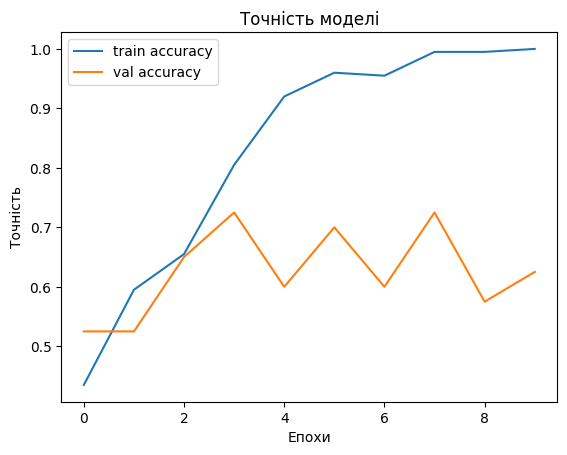

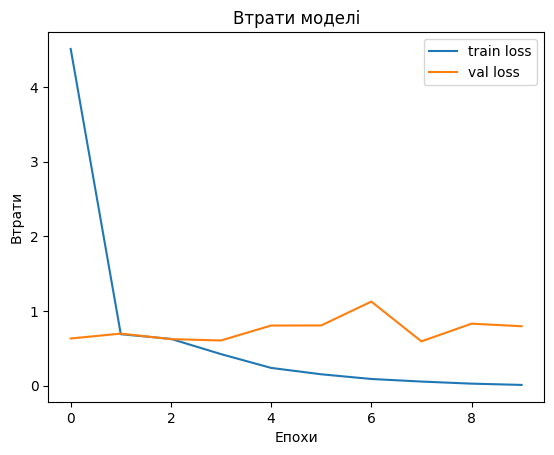

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6333 - loss: 0.8164
Тестова точність: 62.50%


In [3]:
# Завантаження необхідних бібліотек
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Створення ImageDataGenerator для підготовки даних
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Завантаження тренувальних та тестових даних
train_data = train_datagen.flow_from_directory(
    'dataset/train',  # Папка з тренувальними зображеннями
    target_size=(256, 256),   # Розмір зображень
    batch_size=20,            # Розмір батчу
    class_mode='binary'       # Бінарна класифікація (кішка або собака)
)

test_data = test_datagen.flow_from_directory(
    'dataset/test',   # Папка з тестовими зображеннями
    target_size=(256, 256),   # Розмір зображень
    batch_size=20,            # Розмір батчу
    class_mode='binary'       # Бінарна класифікація
)

# Створення моделі CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Для бінарної класифікації
])

# Компіляція моделі
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(
    train_data,
    steps_per_epoch=len(train_data) // 20,  # Кількість батчів
    epochs=10,                              # Кількість епох
    validation_data=test_data,
    validation_steps=len(test_data) // 20   # Кількість батчів для валідації
)

# Візуалізація результатів

# Графік точності
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність моделі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати моделі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

# Оцінка результатів на тестових даних
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Тестова точність: {test_accuracy * 100:.2f}%")
